In [1]:
from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784')

In [61]:
x,y = mnist['data'],mnist['target']


In [62]:
import numpy as np 
import tensorflow as tf

In [63]:
x.shape

(70000, 784)

In [64]:
# x = x.to_numpy() - this is already done but i cant redo it so this is commented. 
y = y.astype(np.int8)


In [65]:
x_train,y_train = x[:60000],y[:60000]
x_test,y_test= x[60000:],y[60000:]

In [66]:
x_test.shape

(10000, 784)

In [67]:
y_train

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: int8

In [68]:
y_test_t = y_test

## one hot encoding y labels 


In [69]:
from tensorflow.keras.utils import to_categorical
y_train,y_test = to_categorical(y_train),to_categorical(y_test)

## normalise x 

In [70]:
x_train = x_train/255.0
x_test = x_test/255.0

## create a model

In [71]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 

In [72]:
model = Sequential([
    Dense(128,activation='relu',input_shape=(784,)),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dense_16 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## compile 

In [73]:
model.compile(
    optimizer = 'sgd', 
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

## Train the model 

In [74]:
training = model.fit(x_train,y_train,batch_size=64,epochs = 20,validation_split=0.2,verbose=1)

Epoch 1/70
750/750 [==============================] - 2s 2ms/step - loss: 1.0021 - accuracy: 0.7464 - val_loss: 0.4545 - val_accuracy: 0.8823
Epoch 2/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4096 - accuracy: 0.8878 - val_loss: 0.3415 - val_accuracy: 0.9028
Epoch 3/70
750/750 [==============================] - 2s 3ms/step - loss: 0.3353 - accuracy: 0.9045 - val_loss: 0.2983 - val_accuracy: 0.9137
Epoch 4/70
750/750 [==============================] - 2s 2ms/step - loss: 0.2983 - accuracy: 0.9151 - val_loss: 0.2706 - val_accuracy: 0.9221
Epoch 5/70
750/750 [==============================] - 2s 2ms/step - loss: 0.2723 - accuracy: 0.9227 - val_loss: 0.2492 - val_accuracy: 0.9289
Epoch 6/70
750/750 [==============================] - 2s 2ms/step - loss: 0.2522 - accuracy: 0.9286 - val_loss: 0.2347 - val_accuracy: 0.9332
Epoch 7/70
750/750 [==============================] - 2s 2ms/step - loss: 0.2351 - accuracy: 0.9329 - val_loss: 0.2223 - val_accuracy: 0.9387
Epoch 

## Evaluate the model 

In [75]:
accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0795 - accuracy: 0.9746


In [76]:
print(training.history.
      keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy and Loss Plots 

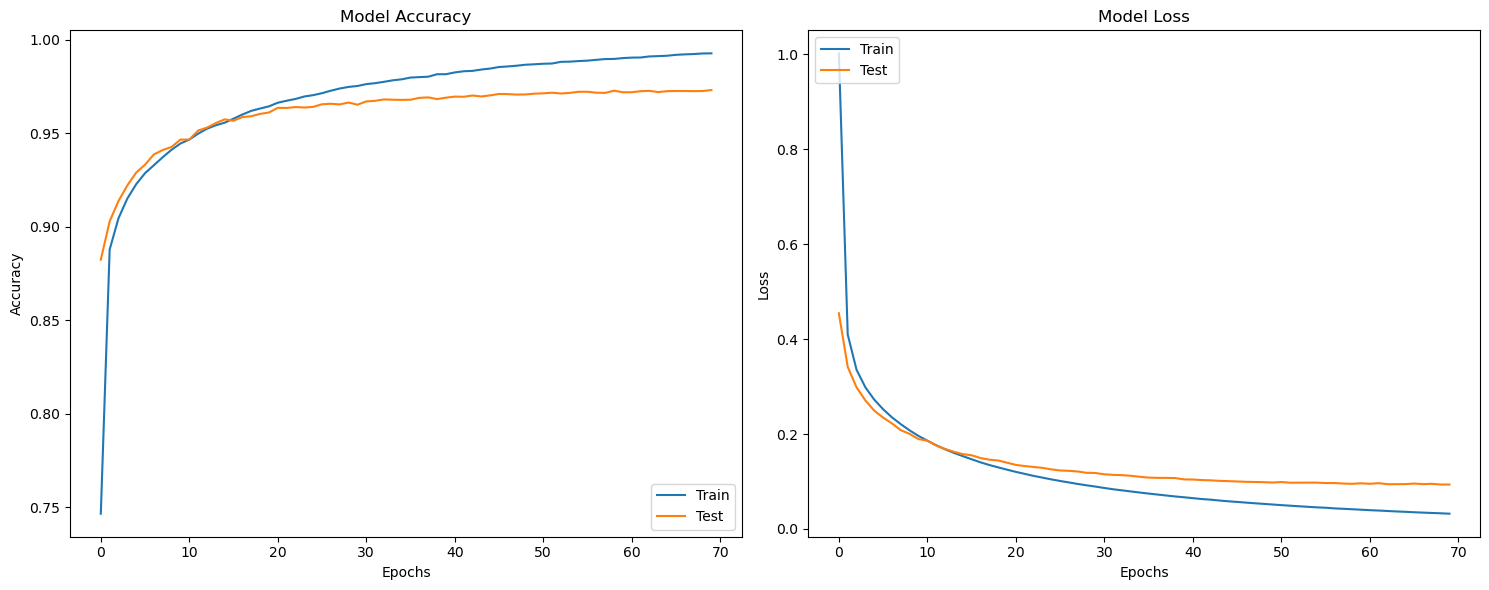

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'lower right')
plt.subplot(1,2,2)
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.tight_layout()

## Predictions

In [78]:
preds = model.predict(x_test)


313/313 [==============================] - 0s 1ms/step


In [1]:
preds[0].shape

NameError: name 'preds' is not defined

In [84]:
y_test_t = y_test_t.to_numpy()

In [85]:
pred = np.argmax(preds[2])
print(pred)
gt = y_test_t[2]
print(gt)

1
1
